In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:

import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


## The dataset available is of tweets send out by different passengers about their experience of 6 different airlines.

In [6]:
# Export the csv file to python notebook
tweet= pd.read_csv(r"C:\Users\kevin\Downloads\Final project\ADMN5015 FINAL PROJECT DATASET (1).csv", encoding="ISO-8859-1")

In [7]:
# taking a peek into the dataset to have an understanding of the different columns and rows.
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14,NaN,Pacific Time (US & Canada)


# Data Cleaning

In [8]:
# See the shape of the dataset
print("Shape of the dataframe is",tweet.shape)


Shape of the dataframe is (14640, 15)


## So we know there are 15 different columns and 14640 rows of data. The next step is understand the number of null values.

In [9]:
# Check for null values in each column
print("The number of nulls in each column are \n", tweet.isna().sum())

The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


## We can see that there are many null valuee. The columns  tweet_coord, negativereason_gold,airline_sentiment_gold have the highest number of null values. So it is better to remove these columns as there is not much data in it.

In [10]:
# Removing unwanted columns
del tweet['tweet_coord']
del tweet['airline_sentiment_gold']
del tweet['negativereason_gold']
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14,NaN,Pacific Time (US & Canada)


# Exploratory Data Analysis

In [11]:
# Checking the number of tweets recieved for each airline
print("Total number of tweets for each airline \n ",tweet.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']


Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


## The Airlines are ranked by their number of tweets recieved, this helps us underestand the popular airlines. United being top ranked by popularity.

In [12]:
# Counting the count of each sentiments 
sentiment_counts = tweet.airline_sentiment.value_counts()
number_of_tweets = tweet.tweet_id.count()
print(sentiment_counts)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


## We can see that the number of negative tweets are very high compared to the positive and neutral combined.

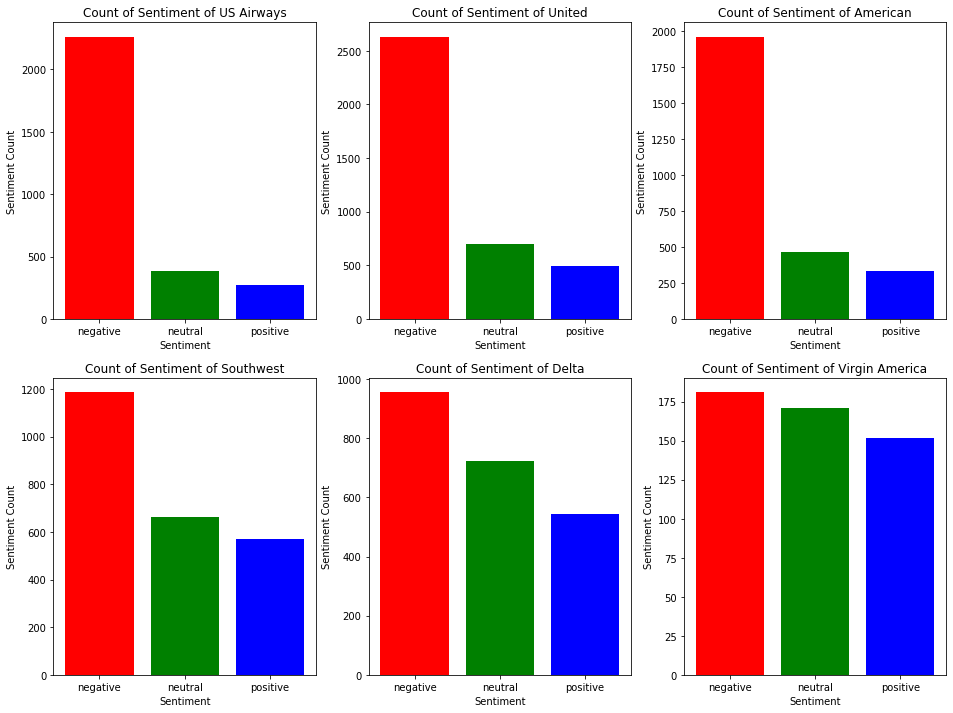

In [13]:
# Plotting sentiment bar graph for each airline. 
plt.figure(1,figsize=(16,12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    df=tweet[tweet['airline']==i]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiment')
    plt.title('Count of Sentiment of '+i)

## A bar graph comparison of the setiments for each airline shows that negative tweets are high for United, US and American Airlines.
## While  Virgin America has a balanced tweet sentinments compared to the rest. 

In [14]:
# Normalizing keywords in the tweets
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

## Tokenisation of the tweets will help us point out what words users use and which of these are used to get the sentiments result. 

In [15]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
tweet['normalized_tweet'] = tweet.text.apply(normalizer)
tweet[['text','normalized_tweet']].head()

C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,normalized_tweet
0,@VirginAmerica What @dhepburn said.,"[dhepburn, said]"
1,@VirginAmerica plus you've added commercials to the experience... tacky.,"[added, commercial, experience, tacky]"
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,"[today, must, mean, need, take, another, trip]"
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","[really, aggressive, blast, obnoxious, entertainment, guest, face, amp, little, recourse]"
4,@VirginAmerica and it's a really big bad thing about it,"[really, big, bad, thing]"


In [16]:
from nltk import ngrams
def ngrams(input_list):
    #onegrams = input_list
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams
tweet['grams'] = tweet.normalized_tweet.apply(ngrams)
tweet[['grams']].head()

,grams
0,[dhepburn said]
1,"[added commercial, commercial experience, experience tacky, added commercial experience, commercial experience tacky]"
2,"[today must, must mean, mean need, need take, take another, another trip, today must mean, must mean need, mean need take, need take another, take another trip]"
3,"[really aggressive, aggressive blast, blast obnoxious, obnoxious entertainment, entertainment guest, guest face, face amp, amp little, little recourse, really aggressive blast, aggressive blast obnoxious, blast obnoxious entertainment, obnoxious entertainment guest, entertainment guest face, guest face amp, face amp little, amp little recourse]"
4,"[really big, big bad, bad thing, really big bad, big bad thing]"


In [17]:
# custom function to count words
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

# Negative Tweets

In [18]:
# count of negatove tweet words
tweet[(tweet.airline_sentiment == 'negative')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 449),
 ('customer service', 438),
 ('cancelled flightled', 425),
 ('late flight', 215),
 ('cancelled flighted', 196),
 ('flight cancelled', 185),
 ('late flightr', 144),
 ('cancelled flight', 131),
 ('hold hour', 128),
 ('flightled flight', 123),
 ('flight cancelled flightled', 117),
 ('flight delayed', 115),
 ('cancelled flightled flight', 107),
 ('call back', 106),
 ('booking problem', 98),
 ('gate agent', 83),
 ('flight flight', 74),
 ('hour late', 69),
 ('delayed flight', 69),
 ('flight attendant', 60)]

## The negative words that are used most that leads to a negative sentiment helps us understand what problems or issues of the service are users not happy about.
## Here "customer service" is flight where most customers are not satisfied with followed by "cancelled flight". 

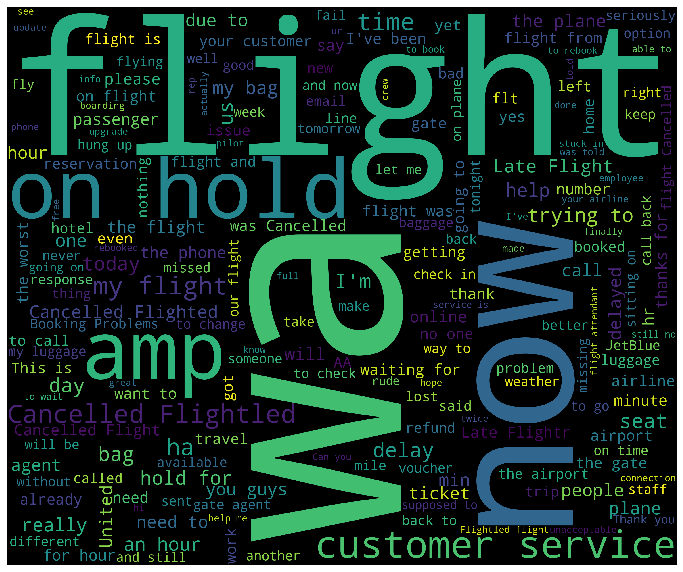

In [19]:
# Word cloud for negative tweet words
from wordcloud import WordCloud,STOPWORDS
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## A word cloud for the negative sentiment tweet words gives a better picture of the reasons for the negative review of the flight.

# Positive tweets

In [20]:
# Count of positive tweet words
tweet[(tweet.airline_sentiment == 'positive')][['grams']].apply(count_words)['grams'].most_common(20)

[('http co', 233),
 ('customer service', 91),
 ('flight attendant', 25),
 ('quick response', 19),
 ('great flight', 17),
 ('best airline', 16),
 ('great job', 16),
 ('great service', 16),
 ('gate agent', 16),
 ('booking problem', 15),
 ('thanks help', 15),
 ('thank much', 15),
 ('good work', 14),
 ('fleet fleek', 14),
 ('fleek http', 14),
 ('fleet fleek http', 14),
 ('fleek http co', 14),
 ('guy rock', 13),
 ('looking forward', 13),
 ('great customer', 12)]

## The positive tweet words that results to positive tweet are pulled out here. The "customer service " here is ranked first here. 
## We can understand that Customer Service in key in both cases for both positive and negative. So, it is important to focus on giving good customer service to get better review and hence attract more customers. 

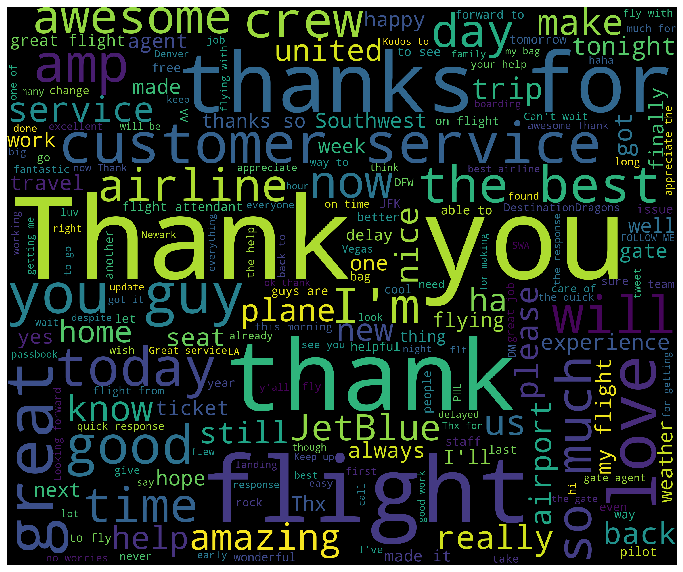

In [21]:
# Creating a Word Cloud for positive words.
df=tweet[tweet['airline_sentiment']=='positive']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## The word cloud gives a better understanding of the positive words used and what might have lead to positive sentiment. As we can see words like "Thank You", "Customer Service", "crew" are key areas and words that leads to positive sentiments.

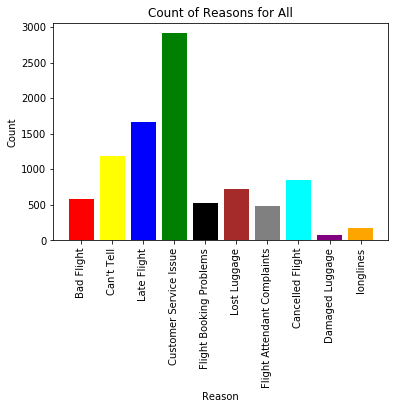

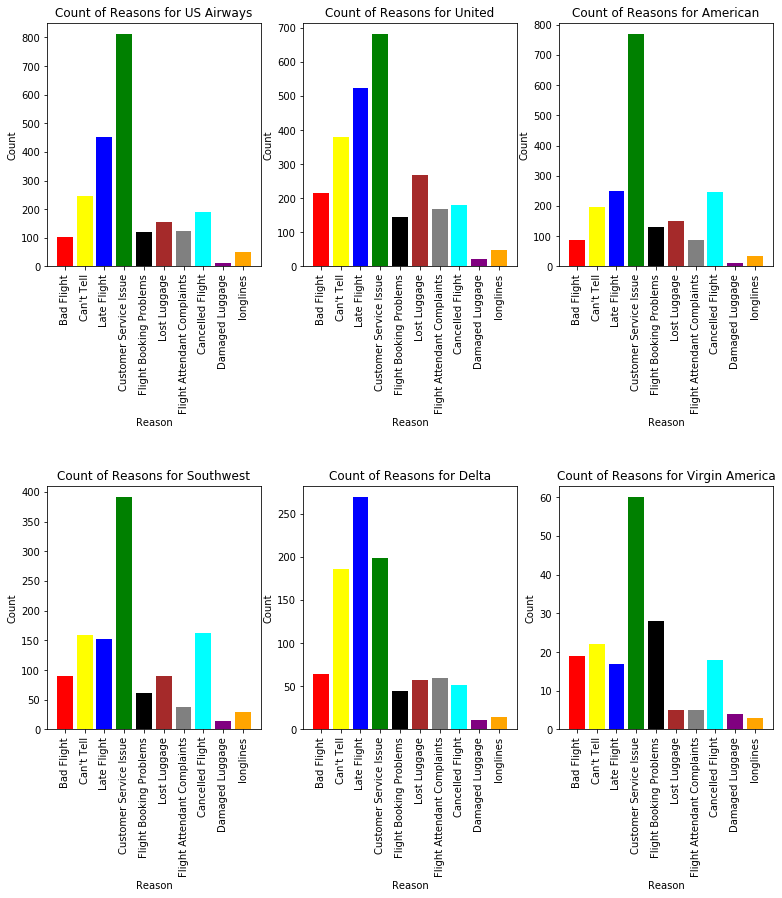

In [22]:
#Get the number of negative reasons
tweet['negativereason'].nunique()

NR_Count=dict(tweet['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=tweet
    else:
        a=tweet[tweet['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


## The bar graph shows the negative reasons for each airline.
## The main reason pointed out for most airlines is the "customer service"
## For Delta the main reason is "Late Flight". 
## Compared to other flights Virgin America has least negative reasons, but this is also due to the feweer number of tweets it received compared to others. 

In [23]:
# Negative tweets by date
date = tweet.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
tweet  = date
day_df = tweet.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative             1  
                               neutral              1  
               United          negative             2  
2015-02-17     Delta           negative             108
                               neutral              86 
                                                    .. 
2015-02-24     United          neutral              49 
                               positive             25 
               Virgin America  negative             10 
                               neutral              6  
                               positive             13 
Length: 136, dtype: int64

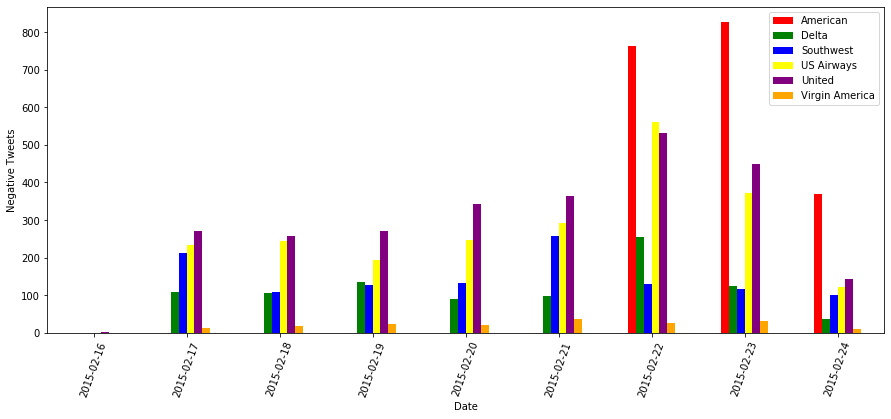

In [24]:
#Plotting the negatrive tweets by date for each airline.
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

# Model Preparation

In [25]:
#Stopwords removal
#Organizing cleaned data under a new name
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [31]:
#Adding back cleaned data
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_to_words(x))

In [27]:
#changing the airline sentiment 
tweet['target']=tweet['airline_sentiment'].map({'negative':0 ,'neutral':1, 'positive':2})

In [28]:
#assigning to X
X = tweet.clean_tweet

In [29]:
#assigning to y
y = tweet['target']

In [33]:
#70% & 30% split for training and test data
# "cleaned" data represents each line of text in the data set and "target" represents the airline_sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(tweet["clean_tweet"].values, tweet["target"].values, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10248,) (4392,) (10248,) (4392,)


# 4. Model Implementation

# a) Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

#%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

In [40]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6969489981785064
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      2814
           1       0.78      0.15      0.26       884
           2       0.93      0.18      0.31       694

    accuracy                           0.70      4392
   macro avg       0.80      0.44      0.46      4392
weighted avg       0.74      0.70      0.62      4392



# Model Evaluation
We first used the Naives Bayes model to predict and in this model the F1 score says that the accuracy level of predicting negative is 81 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 26 and 31 . With this we found the accuracy of the Naives bayes model is  69%

# 6. Testing & Discussion

In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

In [41]:
y_pred = nb.predict(X_train)

In [42]:
accuracy_score( y_pred,y_train)*100

73.53629976580797

### Testing using Test Data

In [45]:
y_pred = nb.predict(X_test)

In [46]:
accuracy_score( y_pred,y_test)*100

69.69489981785064

Final model and the training accuracy of the model was 73.53629976580797%.

The ariline_sentiment  were predicted using the test set and the accuracy was 69.69489981785064%.

The accuracy of the training is at 73% which is not extremely high but still performs reasonably well. Also, as one would expect, the training accuracy was higher than test accuracy. There was a drop of only 3.8% in accuracy which can be considered pretty good. Due to the small in drop in accuracy, the model can be considered as a decent model.

To increase the accuracy, one way is to have a bigger sample size. However, the analysis was limited to the size of the given data. It's also possible that if more variables were used, it might have potentially increased the accuracy of the model.The separation between test and training was 70 to 30 split, the training set had enough data to fit a model that provided a good accuracy and the test size was reasonable enough provide a good testing accuracy as well which would allow to properly valuate the accuracy of the model.

Based on the drop of the accuracy % from training to testing, it can be said that the model is a bit overfitted. Since the drop is not significant, while there is a little of overfitting happening, it can still be considered as a good model.

Since a significant portion of the data was used as training at 70%, it is unlikely that the model is underfitted. However, a different algorithm than the logistic regression might have increased the overall performance.

# b) Support Vector Machine (SVM)

In [48]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [49]:
y_pred = sgd.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7274590163934426
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      2814
           1       0.76      0.13      0.22       884
           2       0.84      0.44      0.58       694

    accuracy                           0.73      4392
   macro avg       0.77      0.52      0.54      4392
weighted avg       0.74      0.73      0.67      4392



# 5. Model Evaluation
We first used the SVM model to predict and in this model the F1 score says that the accuracy level of predicting negative is 83 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 22 and 58 . With this we found the accuracy of the SVM model is great than Naives bayes model i.e 72%

# 6. Testing & Discussion

In [56]:

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                      

In [57]:
y_pred = sgd.predict(X_train)

In [58]:
accuracy_score( y_pred,y_train)*100

70.96018735362998

In [59]:
y_pred = sgd.predict(X_test)

In [60]:
accuracy_score( y_pred,y_test)*100

72.74590163934425

Final model and the training accuracy of the model was 70.96018735362998%.

The ariline_sentiment  were predicted using the test set and the accuracy was 72.74590163934425%.

The accuracy of the training is at 70% which is not extremely high but still performs reasonably well. Also, as one would expect, the test is greater than the training accuracy 

To increase the accuracy, one way is to have a bigger sample size. However, the analysis was limited to the size of the given data. It's also possible that if more variables were used, it might have potentially increased the accuracy of the model.The separation between test and training was 70 to 30 split, the training set had enough data to fit a model that provided a good accuracy and the test size was reasonable enough provide a good testing accuracy as well which would allow to properly valuate the accuracy of the model.

Based on the drop of the accuracy % from training to testing, it can be said that the model is a bit overfitted. Since the drop is not significant, while there is a little of overfitting happening, it can still be considered as a good model.

Since a significant portion of the data was used as training at 70%, it is unlikely that the model is underfitted. However, a different algorithm than the logistic regression might have increased the overall performance.

# c) Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7397540983606558
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2814
           1       0.50      0.53      0.51       884
           2       0.67      0.61      0.64       694

    accuracy                           0.74      4392
   macro avg       0.67      0.66      0.66      4392
weighted avg       0.74      0.74      0.74      4392



# Model Evaluation

# 5. Model Evaluation
We first used the Logistic model to predict and in this model the F1 score says that the accuracy level of predicting negative is 84 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 51 and 64. The F1 score comparetively is much better that the other models. With this we found the accuracy of the Logistic regression model is 73%

# 6. Testing & Discussion

In [74]:
y_pred = logreg.predict(X_train)

In [75]:
accuracy_score( y_pred,y_train)*100

98.87782982045277

In [72]:
y_pred = logreg.predict(X_test)

In [73]:
accuracy_score( y_pred,y_test)*100

73.97540983606558

Final model and the training accuracy of the model was 98.87782982045277%.

The ariline_sentiment  were predicted using the test set and the accuracy was 73.97540983606558%.

The accuracy of the training is at 98%. Also, as one would expect, the training accuracy was higher than test accuracy. There was a drop of more than 20% of accuracy which cannot be cnsidered pretty good. Due to the small in drop in accuracy, the model can be considered as a decent model.

To increase the accuracy, one way is to have a bigger sample size. However, the analysis was limited to the size of the given data. It's also possible that if more variables were used, it might have potentially increased the accuracy of the model.The separation between test and training was 70 to 30 split, the training set had enough data to fit a model that provided a good accuracy and the test size was reasonable enough provide a good testing accuracy as well which would allow to properly valuate the accuracy of the model.

Based on the drop of the accuracy % from training to testing, it can be said that the model is a bit overfitted. Since the drop is not significant, while there is a little of overfitting happening, it can still be considered as a good model.

Since a significant portion of the data was used as training at 70%, it is unlikely that the model is underfitted. However, a different algorithm than the logistic regression might have increased the overall performance.

# d) KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', KNeighborsClassifier(n_neighbors=5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [77]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6969489981785064
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2814
           1       0.42      0.46      0.44       884
           2       0.64      0.52      0.58       694

    accuracy                           0.70      4392
   macro avg       0.62      0.60      0.61      4392
weighted avg       0.70      0.70      0.70      4392



# Model Evaluation

# 5. Model Evaluation
We first used the Knn model to predict and in this model the F1 score says that the accuracy level of predicting negative is 81 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 44 and 58. The F1 score comparetively is much better that the other models but the accuracy of the KNN model is 69%

# e) Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(criterion='entropy', min_samples_leaf=500)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [79]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.6543715846994536
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      2814
           1       0.34      0.12      0.18       884
           2       0.55      0.26      0.35       694

    accuracy                           0.65      4392
   macro avg       0.53      0.43      0.44      4392
weighted avg       0.60      0.65      0.60      4392



# 5. Model Evaluation
We first used the Decision Tree model to predict and in this model the F1 score says that the accuracy level of predicting negative is 79 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 18 and 35. The other models the accuracy of the Decision Tree model is 65% which is less compared to the other models.

# f) Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators = 200, random_state = 0)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)

In [82]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.7661657559198543
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      2814
           1       0.63      0.39      0.48       884
           2       0.78      0.54      0.64       694

    accuracy                           0.77      4392
   macro avg       0.73      0.62      0.66      4392
weighted avg       0.75      0.77      0.75      4392



# 5. Model Evaluation
We first used the Decision Tree model to predict and in this model the F1 score says that the accuracy level of predicting negative is 86 but the accuracy level of 1 & 2 which is neutral and positive its accuracy level is around 48 and 64. THe F1 score is good for all the parameters and its accuracy level is comparetively greater than all the other model i.e Random forest 76%